In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Amit', 'Neha', 'Rahul', 'Priya', 'Sandeep'],
    'Age': [20, None, 21, None, 22],
    'Marks': [85, 90, None, 78, 88],
    'Gender': ['M', 'F', 'M', 'F', 'M']
}

df = pd.DataFrame(data)
df

,ID,Name,Age,Marks,Gender
0,1,Amit,20.0,85.0,M
1,2,Neha,NaN,90.0,F
2,3,Rahul,21.0,NaN,M
3,4,Priya,NaN,78.0,F
4,5,Sandeep,22.0,88.0,M


In [11]:
# 1. Detect missing values
print("\nMissing values:\n", df.isnull().sum())

# 2. Replace missing Age values with mean age
df['Age']=df['Age'].fillna(df['Age'].mean())

# 3. Replace missing Marks values with median marks
df['Marks']=df['Marks'].fillna(df['Marks'].median())
df


Missing values:
 ID        0
Name      0
Age       2
Marks     1
Gender    0
dtype: int64


,ID,Name,Age,Marks,Gender
0,1,Amit,20.0,85.0,M
1,2,Neha,21.0,90.0,F
2,3,Rahul,21.0,86.5,M
3,4,Priya,21.0,78.0,F
4,5,Sandeep,22.0,88.0,M


In [12]:
# Q2. Data Transformation
# ------------------------

df['Result'] = df['Marks'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')
print("\nAfter adding Result column:\n", df)


After adding Result column:
    ID     Name   Age  Marks Gender Result
0   1     Amit  20.0   85.0      M   Pass
1   2     Neha  21.0   90.0      F   Pass
2   3    Rahul  21.0   86.5      M   Pass
3   4    Priya  21.0   78.0      F   Pass
4   5  Sandeep  22.0   88.0      M   Pass


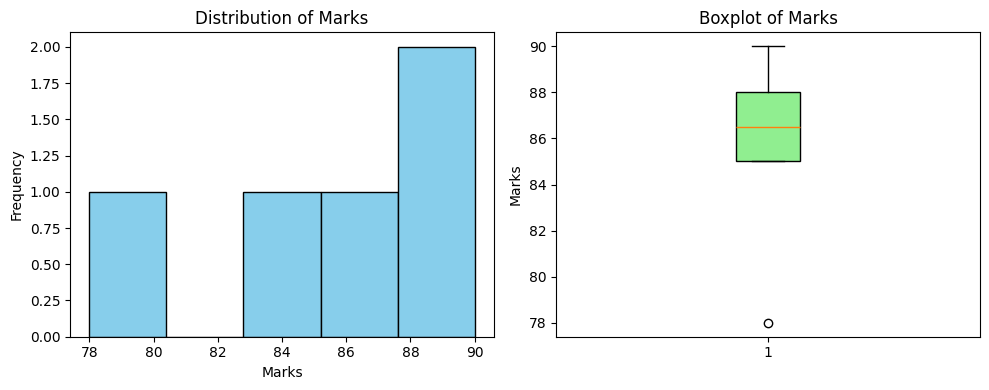

In [13]:
# Q3. Basic Visualization
# ------------------------

plt.figure(figsize=(10,4))

# 1. Histogram for Marks
plt.subplot(1,2,1)
plt.hist(df['Marks'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')

# 2. Boxplot for Marks
plt.subplot(1,2,2)
plt.boxplot(df['Marks'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Marks')
plt.ylabel('Marks')

plt.tight_layout()
plt.show()

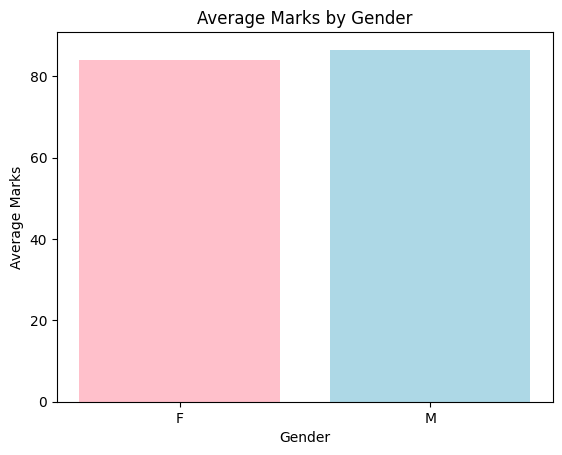

In [14]:

# Q4. Gender-wise Performance
# ----------------------------

gender_avg = df.groupby('Gender')['Marks'].mean()
plt.bar(gender_avg.index, gender_avg.values, color=['pink', 'lightblue'])
plt.title('Average Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Marks')
plt.show()

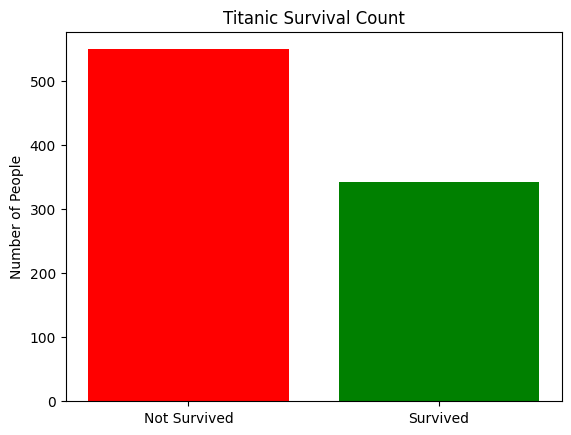

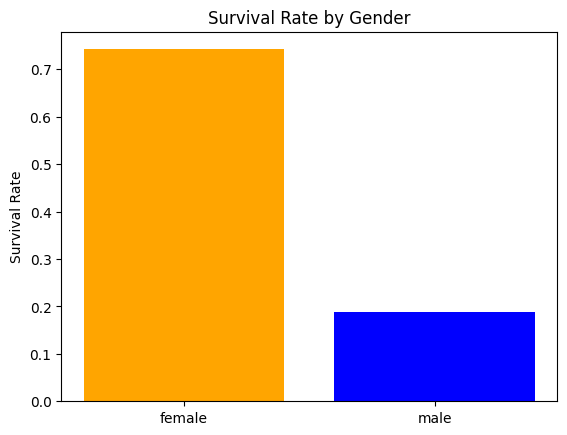

In [15]:
# Q5. Survival Analysis (Titanic Dataset)
# ----------------------------------------

import seaborn as sns  # only to load dataset, not for plotting
titanic = sns.load_dataset('titanic')

# 1. Bar chart of survival counts
survived_counts = titanic['survived'].value_counts()
plt.bar(['Not Survived', 'Survived'], survived_counts.values, color=['red', 'green'])
plt.title('Titanic Survival Count')
plt.ylabel('Number of People')
plt.show()

# 2. Survival rate by Gender
survival_rate = titanic.groupby('sex')['survived'].mean()
plt.bar(survival_rate.index, survival_rate.values, color=['orange', 'blue'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

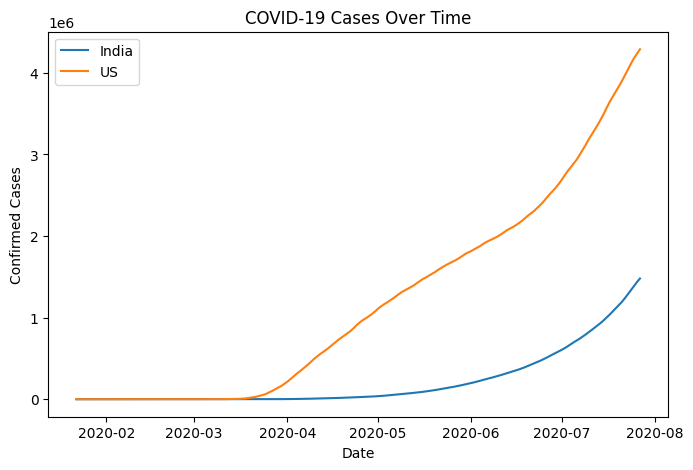

In [18]:
# Q6. COVID-19 Data Visualization
# --------------------------------
# Load your provided CSV
covid = pd.read_csv('covid_19_clean_complete.csv')

# Select relevant columns and remove missing
covid = covid[['Date', 'Country/Region', 'Confirmed', 'Deaths']].dropna()

# Convert date
covid['Date'] = pd.to_datetime(covid['Date'])

# Select two countries to compare
countries = ['India', 'US']

plt.figure(figsize=(8,5))
for c in countries:
    subset = covid[covid['Country/Region'] == c]
    plt.plot(subset['Date'], subset['Confirmed'], label=c)

plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()